In [1]:
# when you change the code of .py document in the ecolab package, you have to restart the kernel of jupyter notebook and 
# run the below import code again to make sure the newest change involved.

import numpy as np
import numba
from ecolab import run_ecolab
from ecolab.environment import Environment
from ecolab.agents import Rabbit, RHD_Status
import warnings
warnings.filterwarnings("ignore")


import matplotlib
import matplotlib.pyplot as plt




In [2]:
# create the environment
env = Environment(shape = [20,20])

#create agents(infants and adults)
Ninfants = 10
Nadults = 200
Infected_Adults = 40
agents = []

for i in range(Ninfants):
    infant = Rabbit(age = np.random.randint(0,90), position = env.get_random_location()) ## age < 90 => infants
    agents.append(infant)
for i in range(Nadults):
    adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location())
    agents.append(adult)
for i in range(Infected_Adults):
    infected_adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location(), infected=True)   
    agents.append(infected_adult)


In [3]:
record, sus, infected, immune, total, infant, agents = run_ecolab(env, agents, Niteration=[100, 250])




iteration: 100
iteration: 101
iteration: 102
iteration: 103
iteration: 104
iteration: 105
iteration: 106
iteration: 107
iteration: 108
iteration: 109
iteration: 110
iteration: 111
iteration: 112
iteration: 113
iteration: 114
iteration: 115
iteration: 116
iteration: 117
iteration: 118
iteration: 119
iteration: 120
iteration: 121
iteration: 122
iteration: 123
iteration: 124
iteration: 125
iteration: 126
iteration: 127
iteration: 128
iteration: 129
iteration: 130
iteration: 131
iteration: 132
iteration: 133
iteration: 134
iteration: 135
iteration: 136
iteration: 137
iteration: 138
iteration: 139
iteration: 140
iteration: 141
iteration: 142
iteration: 143
iteration: 144
iteration: 145
iteration: 146
iteration: 147
iteration: 148
iteration: 149
iteration: 150
iteration: 151
iteration: 152
iteration: 153
iteration: 154
iteration: 155
iteration: 156
iteration: 157
iteration: 158
iteration: 159
iteration: 160
iteration: 161
iteration: 162
iteration: 163
iteration: 164
iteration: 165
iteration:

In [4]:
for i in range(100):
    infected_adult = Rabbit(age = np.random.randint(90,300), position = env.get_random_location(), infected=True)   
    agents.append(infected_adult)

# The start time must be consistent with the last end time
record, sus, infected, immune, total, infant, agents = run_ecolab(env, agents, Niteration=[250, 300],sus=sus,infected=infected, immune=immune, total=total, infant=infant)


iteration: 250
iteration: 251
iteration: 252
iteration: 253
iteration: 254
iteration: 255
iteration: 256
iteration: 257
iteration: 258
iteration: 259
iteration: 260
iteration: 261
iteration: 262
iteration: 263
iteration: 264
iteration: 265
iteration: 266
iteration: 267
iteration: 268
iteration: 269
iteration: 270
iteration: 271
iteration: 272
iteration: 273
iteration: 274
iteration: 275
iteration: 276
iteration: 277
iteration: 278
iteration: 279
iteration: 280
iteration: 281
iteration: 282
iteration: 283
iteration: 284
iteration: 285
iteration: 286
iteration: 287
iteration: 288
iteration: 289
iteration: 290
iteration: 291
iteration: 292
iteration: 293
iteration: 294
iteration: 295
iteration: 296
iteration: 297
iteration: 298
iteration: 299


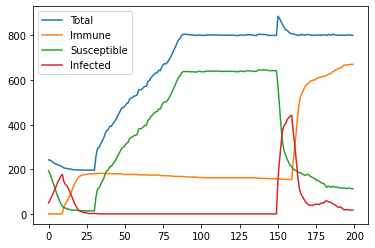

In [5]:
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(total, label='Total')
ax.plot(immune, label='Immune')
ax.plot(sus, label='Susceptible')
#ax.plot(infant, label='Infants')
ax.plot(infected, label='Infected')
#ax.plot(male, label='Male')
#ax.plot(female, label='Female')


leg = ax.legend();

In [6]:
#def draw_animation(fig,record,fps=20,saveto=None):
    """
    Draw the animation for the content of record. This doesn't use the draw
    functions of the classes.
    - fig figure to draw to
    - record = the data to draw
    - fps = frames per second
    - saveto = where to save it to
    """
    #rc('animation', html='html5')
    if len(record)==0: return None

    im = plt.imshow(np.zeros_like(record[0]['infected agents']), interpolation='none', aspect='auto', vmin=0, vmax=3, cmap='gray')
    ax = plt.gca()

    #foxesplot = ax.plot(np.zeros(1),np.zeros(1),'bo',markersize=10)
    rabbitsplot = ax.plot(np.zeros(1),np.zeros(1),'yx',markersize=10,mew=3)

    def animate_func(i):
            im.set_array(record[i]['infected agents'])
            ags = record[i]['total']
            if len(ags)==0:
                rabbitsplot[0].set_data([],[])
                #foxesplot[0].set_data([],[])
                return
            coords = ags[ags[:,-1].astype(bool),0:2]
            rabbitsplot[0].set_data(coords[:,1],coords[:,0])
            #coords = ags[~ags[:,-1].astype(bool),0:2]
            #foxesplot[0].set_data(coords[:,1],coords[:,0])
            #return [im]#,rabbits,foxes]

    anim = animation.FuncAnimation(
                                   fig, 
                                   animate_func, 
                                   frames = len(record),
                                   interval = 1000 / fps, repeat=False # in ms
                                   )
    if saveto is not None: anim.save(saveto, fps=fps, extra_args=['-vcodec', 'libx264']) 
    from IPython.display import HTML
    return HTML(anim.to_jshtml())

IndentationError: unexpected indent (244214660.py, line 2)

In [ ]:
#%matplotlib notebook 
#fig1 = plt.figure( figsize=(8,8) )
#draw_animation(fig1, record[::5],5,saveto='test_anim.mp4') #draw every 5th frame

In [ ]:
len(agents)